In [1]:
!pip install simpy


In [2]:
import simpy
import random
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
import simpy
import random
import pandas as pd

def bank(env, counters, service_time, wait_times):
    arrival_time = env.now
    with counters.request() as request:
        yield request
        wait = env.now - arrival_time
        wait_times.append(wait)
        yield env.timeout(service_time)

def customer_generator(env, counters, arrival_rate, service_time, wait_times):
    while True:
        yield env.timeout(random.expovariate(arrival_rate))
        env.process(bank(env, counters, service_time, wait_times))

def run_simulation(arrival_rate, service_time, num_counters, sim_time):
    env = simpy.Environment()
    counters = simpy.Resource(env, capacity=num_counters)
    wait_times = []

    env.process(customer_generator(env, counters, arrival_rate, service_time, wait_times))
    env.run(until=sim_time)

    return sum(wait_times)/len(wait_times) if wait_times else 0


In [4]:
data = []

for _ in range(1000):
    arrival_rate = random.uniform(1,10)
    service_time = random.uniform(2,15)
    num_counters = random.randint(1,5)
    sim_time = random.randint(200,500)

    avg_wait = run_simulation(arrival_rate, service_time, num_counters, sim_time)

    data.append([arrival_rate, service_time, num_counters, sim_time, avg_wait])

df = pd.DataFrame(data, columns=["arrival_rate","service_time","num_counters","sim_time","avg_wait"])
df.head()


,arrival_rate,service_time,num_counters,sim_time,avg_wait
0,5.525068,7.764380,2,435,203.285574
1,9.361786,8.422465,1,444,215.617499
2,8.250681,14.449178,1,318,150.632541
3,4.700228,6.221365,5,354,142.393905
4,5.850367,2.050820,4,316,103.252879


In [5]:
df.head()
df.describe()


,arrival_rate,service_time,num_counters,sim_time,avg_wait
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.507644,8.603492,3.096000,352.332000,152.936383
std,2.611549,3.772565,1.425067,87.113848,45.380004
min,1.003008,2.008713,1.000000,201.000000,0.280707
25%,3.298426,5.520226,2.000000,278.000000,117.786151
50%,5.541180,8.493857,3.000000,349.000000,152.458821
75%,7.734977,11.942227,4.000000,430.250000,190.791268
max,9.987648,14.978427,5.000000,500.000000,241.583886


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

X = df.drop("avg_wait", axis=1)
y = df["avg_wait"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR()
}

results = []

for name, model in models.items():
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test,preds)
    mae = mean_absolute_error(y_test,preds)
    results.append([name, r2, mae])

results_df = pd.DataFrame(results, columns=["Model","R2 Score","MAE"])
results_df.sort_values(by="R2 Score", ascending=False)


,Model,R2 Score,MAE
3,Gradient Boosting,0.979939,4.449962
2,Random Forest,0.971935,4.818120
0,Linear Regression,0.928247,9.655902
1,Decision Tree,0.916764,8.167461
4,KNN,0.901824,8.648255
5,SVR,0.816414,13.243318


In [7]:
results_df


,Model,R2 Score,MAE
0,Linear Regression,0.928247,9.655902
1,Decision Tree,0.916764,8.167461
2,Random Forest,0.971935,4.818120
3,Gradient Boosting,0.979939,4.449962
4,KNN,0.901824,8.648255
5,SVR,0.816414,13.243318


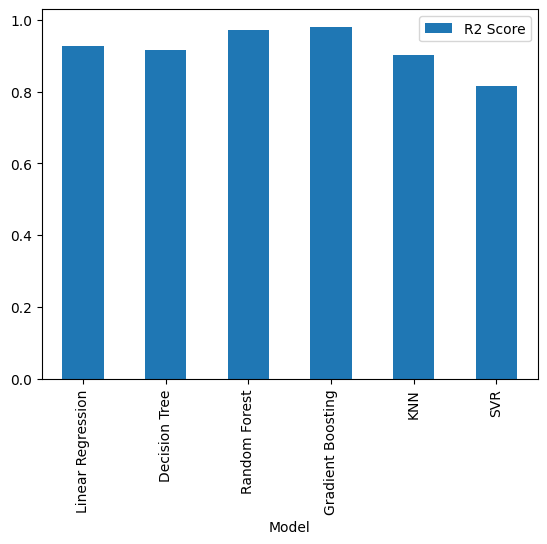

In [8]:
results_df.plot(x="Model", y="R2 Score", kind="bar")
plt.show()
